<a href="https://colab.research.google.com/github/seelca/non-trivial-floorplans/blob/main/from_planar_to_dual_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

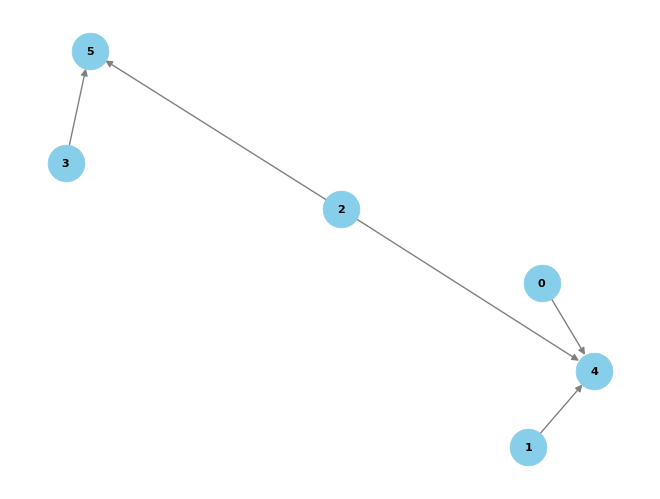

In [22]:
#check planar graph and draw it
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load data from CSV file
file_path = '/content/drive/MyDrive/Self-organising L-shaped plans/output.csv'
df = pd.read_csv(file_path)

# Create a directed graph
G = nx.from_pandas_edgelist(df, 'Source', 'Target', create_using=nx.DiGraph())

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8, edge_color='gray', linewidths=0.5, arrows=True)

# Show the plot
plt.show()

In [23]:
# Print the graph edges
print("The graph edges are:")
for edge in G.edges():
    print(edge)

The graph edges are:
(2, 4)
(2, 5)
(1, 4)
(0, 4)
(3, 5)


In [24]:
print(G)

DiGraph with 6 nodes and 5 edges


In [26]:
def planar_to_dual(original_graph):
    dual_graph = {}

    # Step 1: Identify Faces
    faces = list(original_graph.keys())
    print(faces)

    # Step 2: Create a Vertex for Each Face
    for face in faces:
        dual_graph[face] = set()

    # Step 3: Connect Vertices in the Dual Graph
    for face1 in faces:
        for face2 in faces:
            if face1 != face2:
                shared_edge = set(original_graph[face1]) & set(original_graph[face2])
                if shared_edge:
                    dual_graph[face1].add(face2)
                    dual_graph[face2].add(face1)

    return dual_graph

# Example usage:
original_graph = nx.to_dict_of_lists(G)

dual_graph = planar_to_dual(original_graph)

# Print the dual graph
for vertex, neighbors in dual_graph.items():
    print(f"{vertex}: {neighbors}")


[2, 4, 1, 0, 5, 3]
2: {0, 1, 3}
4: set()
1: {0, 2}
0: {1, 2}
5: set()
3: {2}
